
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

It is a __classification__ problem because of the two discrete outcomes of students who might need early intervention before they fail or pass. 

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [359]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [360]:
# Read student data
student_data = pd.read_csv("student-data.csv")

In [361]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [362]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [363]:
student_data.shape

(395, 31)

In [364]:
student_data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [365]:
# Calculate number of students
stu_no=len(student_data)

In [366]:
# Calculate number of features
features_no=student_data.columns.value_counts().sum()-1

In [367]:
# Calculate passing students
stu_pass=student_data['passed'].value_counts().yes

In [368]:
# Calculate failing students
stu_fail=student_data['passed'].value_counts().no

In [369]:
# Calculate graduation rate
grad_rate=round((student_data['passed'].value_counts().yes)/len(student_data)*100)

In [370]:
# Print the results
print('Number of students= ',stu_no)
print('Number of features= ',features_no)
print('Passing students=',stu_pass)
print('Failing students= ',stu_fail)
print('graduation rate= ',grad_rate,'%')

Number of students=  395
Number of features=  30
Passing students= 265
Failing students=  130
graduation rate=  67 %


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [371]:
# Extract feature columns
student_data.drop(['passed'],axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [372]:
# Extract target column 'passed'
student_data['passed']

0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [373]:
# Separate the data into feature data and target data (X and y, respectively)
X=student_data.drop(['passed'],axis=1)
y=student_data['passed']

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [374]:
#categorical data
categorical_cols = ['Mjob', 'Fjob','reason','guardian' ] 
df = pd.get_dummies(X, columns = categorical_cols)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,MS,M,17,U,LE3,T,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school             395 non-null    object
 1   sex                395 non-null    object
 2   age                395 non-null    int64 
 3   address            395 non-null    object
 4   famsize            395 non-null    object
 5   Pstatus            395 non-null    object
 6   Medu               395 non-null    int64 
 7   Fedu               395 non-null    int64 
 8   traveltime         395 non-null    int64 
 9   studytime          395 non-null    int64 
 10  failures           395 non-null    int64 
 11  schoolsup          395 non-null    object
 12  famsup             395 non-null    object
 13  paid               395 non-null    object
 14  activities         395 non-null    object
 15  nursery            395 non-null    object
 16  higher             395 non-null    object
 1

In [376]:
from sklearn.preprocessing import LabelEncoder
label_en =LabelEncoder()
a=['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid', 'activities','nursery','higher','internet','romantic']
for i in np.arange(len(a)):
    X[a[i]]=label_en.fit_transform(X[a[i]])

In [377]:
X=pd.concat([X,df],axis=1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,at_home,teacher,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,at_home,other,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,at_home,other,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,health,services,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,other,other,...,1,0,0,0,1,0,0,1,0,0


In [378]:
X=X.drop(categorical_cols, axis=1)
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [379]:
X=X.drop(a, axis=1)
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,4,3,4,1,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,0,0,0,0,0,1
391,17,3,1,2,1,0,2,4,5,3,...,0,1,0,1,0,0,0,0,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,0,1,0,0,0,0,0,1
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,1,0,0,0,0,1,0


In [380]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  age                395 non-null    int64
 14  Medu               395 non-null    int64
 15  Fedu               395 non-null    int64
 16  traveltime         395 non-null    int64
 17  studytime       

In [381]:
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'age',
       'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [382]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=2)

In [383]:
X_train.shape

(276, 43)

In [384]:
y_train.shape

(276,)

In [385]:
X_test.shape

(119, 43)

In [386]:
y_test.shape

(119,)

In [387]:
# splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=2)

In [388]:
# Show the results of the split
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
10,15,4,4,1,2,0,3,3,3,1,...,0,0,0,0,0,0,1,0,1,0
112,16,2,2,1,2,1,3,1,2,1,...,1,0,0,0,1,0,0,0,1,0
338,18,3,3,1,4,0,5,3,3,1,...,0,1,0,0,1,0,0,0,1,0
292,18,2,1,1,2,1,5,4,3,1,...,0,0,0,0,0,0,1,0,1,0
305,18,2,4,1,2,1,4,4,3,1,...,0,0,0,0,0,0,1,0,0,1


In [389]:
y_train.head()

10      no
112    yes
338    yes
292    yes
305    yes
Name: passed, dtype: object

In [390]:
X_test.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
94,15,2,2,1,4,0,4,3,4,1,...,0,0,0,0,0,0,1,0,1,0
32,15,4,3,1,2,0,4,5,2,1,...,0,0,0,1,0,0,0,0,1,0
222,16,2,3,1,2,0,2,3,1,1,...,0,0,1,0,0,1,0,0,1,0
329,17,4,4,2,3,0,4,3,3,1,...,0,0,1,1,0,0,0,0,1,0
369,18,4,4,3,2,0,3,2,2,4,...,0,0,1,0,0,1,0,1,0,0


In [391]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  age                395 non-null    int64
 14  Medu               395 non-null    int64
 15  Fedu               395 non-null    int64
 16  traveltime         395 non-null    int64
 17  studytime       

In [392]:
y_test.head()

94     yes
32     yes
222    yes
329    yes
369    yes
Name: passed, dtype: object

### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.


Supervised models chosen for this problem are,

1. __Logistic regression__
2. __KNN__
3. __Random Forest__

#  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

1.__Logistic Regression__ 
>Logistic regression is chosen as first model because it is a binary classification problem. 

General applications of logistic regression model are __credit scoring, medicine, NLP__ 

Strengths and weakness of logistic question are 

__Strengths:__
 - Outputs have a nice probabilistic interpretation
 - the algorithm can be regularized to avoid overfitting.
 - Logistic models can be updated easily with new data using stochastic gradient descent. 
 
__Weaknesses:__   
- Logistic regression tends to underperform when there are multiple or non-linear decision boundaries. 
- They are not flexible enough to naturally capture more complex relationships.

2.__KNN__ 
>KNN algorithms use data and classify new data points based on similarity measures. 

General applications of are KNN recommender __Systems,Text mining, agriculture,finance, medical,facial recognition.__

Strengths and weakness of Random Forest are 

__Strengths:__
- K-NN is pretty intuitive and simple
- K-NN has no assumptions
- No Training Step
Weaknesses:
- K-NN is a slow algorithm
- K-NN needs homogeneous features
- Outlier sensitivity

3.__Random Forest__ 
>The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm. 

General applications of Random Forest are __Banking Industry, Healthcare and Medicine, Stock Market, E-Commerce.__ 

Strengths and weakness of Random Forest are 

__Strengths__
- It reduces overfitting in decision trees and helps to improve the accuracy
- It is flexible to both classification and regression problems
- It works well with both categorical and continuous values
- It automates missing values present in the data

__weakness:__
- It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
- It also requires much time for training as it combines a lot of decision trees to determine the class.



In [393]:
#Importing the three supervised learning models from sklearn
#logistic regression
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
#KNN
from sklearn.neighbors import KNeighborsClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


__Logistic Regression__

In [394]:
# fit model-1  on traning data 
#Logistic Regression
logit_model.fit(X_train, y_train)

/Users/nitha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [395]:
# predict on the test data 
y_pred= logit_model.predict(X_test)

In [396]:
# calculate the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.7310924369747899
Precision is: 0.7010869565217391
Recall is : 0.6423076923076924
f1 score is: 0.6510263929618769


In [397]:
t=[]
t.append(['Logistic Regression',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

In [398]:
confusion_matrix(y_test, y_pred)

array([[15, 24],
       [ 8, 72]])

__KNN__

In [399]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [400]:
acc_values

[0.6722689075630253,
 0.6638655462184874,
 0.7478991596638656,
 0.6890756302521008,
 0.7310924369747899,
 0.7058823529411765,
 0.7142857142857143,
 0.7058823529411765,
 0.7310924369747899,
 0.7310924369747899,
 0.7142857142857143,
 0.6974789915966386]

Text(0, 0.5, 'accuracy')

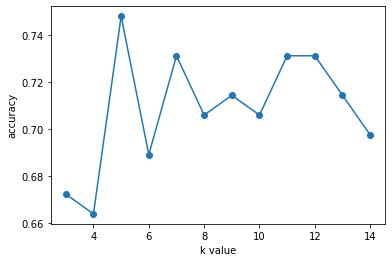

In [401]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')


In [402]:
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [403]:
t.append(['KNN',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

In [404]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.7478991596638656
Precision is: 0.7229787234042553
Recall is : 0.667948717948718
f1 score is: 0.6794181034482758


In [405]:
confusion_matrix(y_test, y_pred)

array([[17, 22],
       [ 8, 72]])

__Random Forest__

In [406]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [407]:
t.append(['Random Forest',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

In [408]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.7142857142857143
Precision is: 0.6723404255319149
Recall is : 0.6298076923076923
f1 score is: 0.6366738505747126


In [409]:
confusion_matrix(y_test,y_pred)

array([[15, 24],
       [10, 70]])

__With test data size= 0.2__

In [410]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=2)

__Logistic regression__

In [411]:
logit_model.fit(X_train, y_train)
y_pred= logit_model.predict(X_test)

/Users/nitha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [412]:
t.append(['Logistic Regression(.2)',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

In [413]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.759493670886076
Precision is: 0.7417582417582418
Recall is : 0.662962962962963
f1 score is: 0.6765783236371472


In [414]:
confusion_matrix(y_test, y_pred)

array([[10, 15],
       [ 4, 50]])

__KNN__

In [415]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [416]:
acc_values

[0.6835443037974683,
 0.6329113924050633,
 0.7215189873417721,
 0.6708860759493671,
 0.7088607594936709,
 0.7088607594936709,
 0.759493670886076,
 0.7215189873417721,
 0.7468354430379747,
 0.7215189873417721,
 0.759493670886076,
 0.759493670886076]

Text(0, 0.5, 'accuracy')

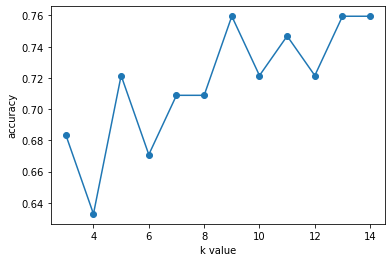

In [417]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [418]:
classifier=KNeighborsClassifier(n_neighbors=10, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [419]:
t.append(['KNN(.2)',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

In [420]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.7215189873417721
Precision is: 0.6789044289044289
Recall is : 0.6137037037037038
f1 score is: 0.618859649122807


In [421]:
confusion_matrix(y_test, y_pred)

array([[ 8, 17],
       [ 5, 49]])

__Random Forest__

In [422]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [423]:
t.append(['Random Forest(.2)',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

In [424]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.7088607594936709
Precision is: 0.654945054945055
Recall is : 0.6044444444444445
f1 score is: 0.6084895496660203


In [425]:
confusion_matrix(y_test,y_pred)

array([[ 8, 17],
       [ 6, 48]])

In [426]:
values = pd.DataFrame(t, columns = ['Algorithms', 'F1-Score','Accuracy','Precision','Recall'])
values

,Algorithms,F1-Score,Accuracy,Precision,Recall
0,Logistic Regression,0.65103,0.73109,0.70109,0.64231
1,KNN,0.67942,0.74790,0.72298,0.66795
2,Random Forest,0.63667,0.71429,0.67234,0.62981
3,Logistic Regression(.2),0.67658,0.75949,0.74176,0.66296
4,KNN(.2),0.61886,0.72152,0.67890,0.61370
5,Random Forest(.2),0.60849,0.70886,0.65495,0.60444


__Logistic regression__ with test size .2 has the highest __accuracy__ of __75.9%__ and the __precision__ of __74.1%.__ Therefore, __Logistic regression__ with test size .2 is the best model.